<a href="https://colab.research.google.com/github/felixlys/ClaimDistribution/blob/main/DistribusiBykKlaim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengkonstruksi Distribusi Banyak Klaim dan Klaim Sukses
Analisis distribusi jumlah klaim dan klaim sukses merupakan langkah penting dalam manajemen risiko, khususnya dalam industri asuransi.
Klaim merupakan tuntutan yang diajukan oleh pemegang polis kepada perusahaan asuransi untuk mendapatkan kompensasi sesuai dengan ketentuan polis. Dalam praktiknya, tidak semua klaim yang diajukan akan berhasil atau disetujui oleh perusahaan asuransi. Oleh karena itu, penting bagi perusahaan asuransi untuk memahami pola distribusi dari jumlah klaim yang diajukan dan klaim yang sukses disetujui setiap bulannya.

Distribusi klaim dapat membantu perusahaan asuransi dalam memperkirakan jumlah klaim yang mungkin akan diajukan di masa mendatang, serta berapa banyak klaim yang kemungkinan besar akan disetujui. Informasi ini sangat berharga untuk pengaturan dana, penetapan  harga premi. Diberikan data bulanan jumlah klaim dan jumlah klaim yang sukses  sebagai berikut:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df1=pd.read_excel('DataKlaimAsuransi.xlsx')
print(df1)

    Bulan  Byk Klaim  klaim sukses
0       1          5             3
1       2          7             5
2       3          7             3
3       4          7             3
4       5          1             1
5       6          6             4
6       7          2             0
7       8          5             3
8       9          5             4
9      10          8             4
10     11          1             0
11     12          9             4


In [3]:
Bulan=np.array(df1['Bulan'])
BykKlaim=np.array(df1['Byk Klaim'])
Sukses=np.array(df1['klaim sukses'])

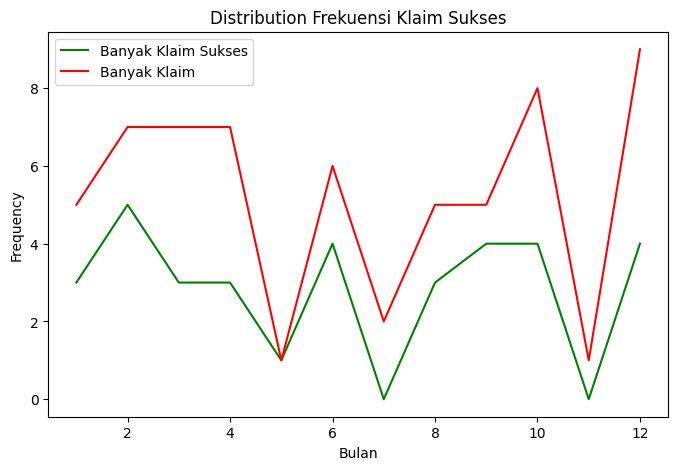

In [4]:
#Histogram klaim sukses dan byk klaim
plt.figure(figsize=(8, 5))
plt.plot(Bulan,Sukses,color='green',label='Banyak Klaim Sukses')
plt.plot(Bulan,BykKlaim,color='red',label='Banyak Klaim')
plt.title('Distribution Frekuensi Klaim Sukses')
plt.xlabel('Bulan')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 Pada kurva tersebut tampak bahwa banyaknya klaim lebih dari atau sama dengan banyaknya klaim sukses. Hal ini mengingat bahwa tidak semua klaim yang masuk pada perusahaan asuransi sukses dilakukan.\\

 Banyaknya klaim dapat dianalogikan dengan banyaknya orang yang berada dalam antrian. Oleh karena itu, pada penelitian ini akan dimodelkan banyak klaim dengan distribusi Poisson $N\sim POI(\lambda)$ dengan probability mass function sebagai berikut
\begin{equation}
P(N=n)=\frac{e^{-\lambda}\,\lambda^{n}}{n!}, n=0,1,2,3,\cdots
\end{equation}
dengan $\lambda$ yang diestimasi dengan metode Maksimum Likelihood, dengan estimator sebagai berikut ⁉
\begin{equation}
\hat{\lambda}=\frac{\sum^{n}_{i=1} X_{i}}{n}
\end{equation}
dengan $X_{i}$ merupakan data byk klaim ke-$i$ untuk $i=1,2,3,4,\cdots,n$. Pada kasus ini $n=12$(karena ada 12 sampel data). Berikut merupakan tahap estimasi parameter $\lambda$ :

In [5]:
#Maximum Likelihood Estimation
#Distribusi Poisson
n=len(BykKlaim)
lam=np.sum(BykKlaim)/n
print(lam)

5.25


Berdasarkan teori ekspektasi, rata rata sampel acak yang terdistribusi tertentu akan menghampiri rata-rata populasi nya. Oleh karena itu, setelah didapatkan parameter $\lambda=5.25$ dilakukan simulasi dengan mengenerate $N\sim POI(5.25)$ sebanyak 12 data dan diulangi sebanyak 1000 kali(1000 sample path). Setelah itu, dicari nilai rata-rata dari 1000 sample path.

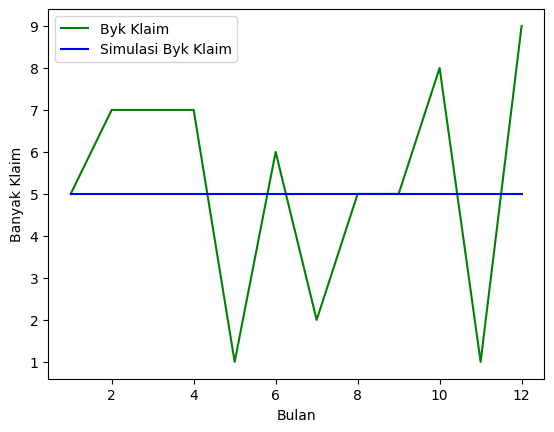

In [7]:
#Simulasi Byk Klaim
Sim=1000
M=np.zeros([Sim,12])
M[:,0]=5
for i in range(Sim):
  M[i,1:]=np.random.poisson(lam=lam,size=11)
rataPoi=np.mean(M,dtype=int,axis=0)
plt.plot(Bulan,BykKlaim,label='Byk Klaim',color='green')
plt.plot(Bulan,rataPoi,label='Simulasi Byk Klaim',color='blue')
plt.xlabel('Bulan')
plt.ylabel('Banyak Klaim')
plt.legend()
plt.show()

Didapatkan nilai rata-rata sampel(dalam pembulatan) adalah 5. Artinya, apabila distribusi banyak klaim dimodelkan dengan distribusi poisson maka diperoleh byk nya klaim selama 12 bulan adalah sebanyak 5 klaim per bulan.

Selanjutnya, apabila banyak klaim sukses dari byk klaim yg masuk dimodelkan dengan distribusi binomial $V\sim BIN(N,p)$ dengan probability mass function sebagai berikut
\begin{equation}
P(V=v)=\begin{pmatrix} N\\v \end{pmatrix} p^{v}(1-p)^{N-v}.
\end{equation}
dengan $p$ diestimasi dengan metode maksimum Likelihood sebagai berikut
\begin{equation}
\hat{p}=\frac{\sum^{n}_{i=1} Y_{i}}{N\,n}
\end{equation}
dengan $Y_{i}$ menunjukkan data ke $i$ untuk $i=1,2,3,4\cdots,n$ dan $N$ merupakan banyak klaim yang terjadi. Pada kasus ini digunakan $n=12$(karena ada 12 sampel data) dan $N=5$(karena pada hasil simulasi banyak klaim, ada 5 klaim yg terjadi selama 12 bulan).Berikut merupakan estimasi dari nilai $p$ :

In [9]:
#MLE untuk distribusi binomial
p=np.sum(Sukses)/(12*5)
print(p)

0.5666666666666667


In [ ]:
print(M)

[[ 5.  5.  6. ...  5.  7.  2.]
 [ 5.  8. 10. ...  6.  6.  9.]
 [ 5.  7.  6. ...  4.  6.  4.]
 ...
 [ 5.  0.  7. ...  5.  4.  3.]
 [ 5.  6.  9. ...  7.  6.  5.]
 [ 5.  5.  4. ...  5.  6.  6.]]


Setelah didapatkan parameter $p=0.5666666667$ dilakukan simulasi dengan mengenerate $V\sim BIN(5,p)$ sebanyak 12 data dan diulangi sebanyak 1000 kali(1000 sample path). Setelah itu, dicari nilai rata-rata dari 1000 sample path.

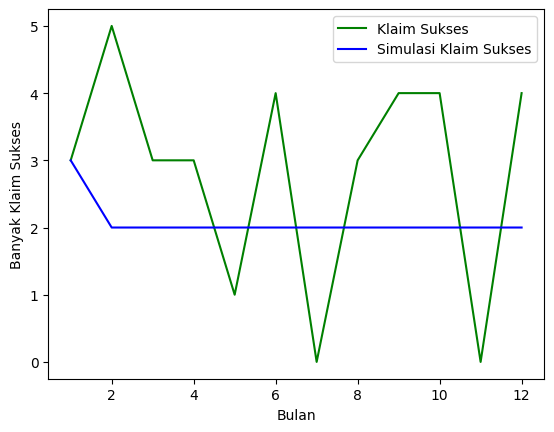

In [10]:
Sim=1000
N=np.zeros([Sim,len(rataPoi)])
N[:,0]=3
for i in range(Sim):
  N[i,1:]=np.random.binomial(n=5,p=p,size=11)
rataBin=np.mean(N,axis=0,dtype=int)
plt.plot(Bulan,Sukses,label='Klaim Sukses',color='green')
plt.plot(Bulan,rataBin,label='Simulasi Klaim Sukses',color='blue')
plt.xlabel('Bulan')
plt.ylabel('Banyak Klaim Sukses')
plt.legend()
plt.show()

Didapat ada 2 klaim yang sukses pada setiap bulan selama 12 bulan.


# Strategi 2 : Apabila data banyak klaim dalam satu bulan tidak disimulasikan sehingga diasumsikan banyak klaim di tahun yg disimulasikan dianggap sama seperti data di tahun ini.

Pada strategi ini, kita memgasumsikan bahwa jumlah klaim di tahun ini dan di tahun yg akan kita simulasikan itu diasumsikan sama.

Selanjutnya, apabila banyak klaim sukses dr klaim yang masuk dimodelkan dengan distribusi binomial $V\sim BIN(N,p)$ dengan probability mass function sebagai berikut
\begin{equation}
P(V=v)=\begin{pmatrix} N\\v \end{pmatrix} p^{v}(1-p)^{N-v}.
\end{equation}
dengan $p$ diestimasi dengan metode maksimum Likelihood sebagai berikut
\begin{equation}
\hat{p}=\frac{\sum^{n}_{i=1} Y_{i}}{\sum^{n}_{i=1} N_{i}}
\end{equation}
dengan $Y_{i}$ menunjukkan data ke $i$ untuk $i=1,2,3,4\cdots,n$ dan $N_{i}$ merupakan banyak klaim ke-$i$. Pada kasus ini digunakan $n=12$(karena ada 12 sampel data) dan $N=5$(karena pada hasil simulasi banyak klaim, ada 5 klaim yg terjadi selama 12 bulan).Berikut merupakan estimasi dari nilai $p$ :

In [11]:
#Estimasi MLE
p=np.sum(Sukses)/np.sum(BykKlaim)

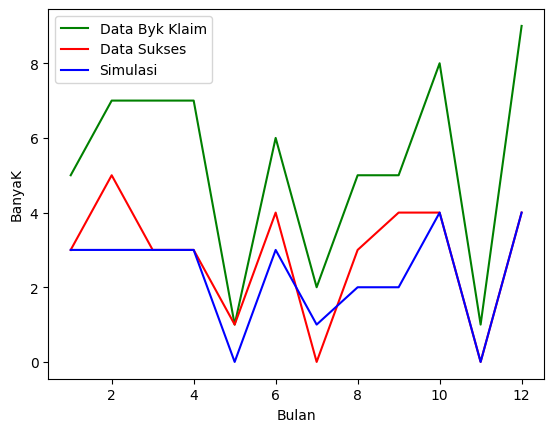

In [12]:
Sim=1000
N1=np.zeros([Sim,len(rataPoi)])
N1[:,0]=3
for i in range(Sim):
  N1[i,1:]=np.random.binomial(n=BykKlaim[1:12],p=p,size=11)
rataBin1=np.mean(N1,axis=0,dtype=int)
plt.plot(Bulan,BykKlaim,label='Data Byk Klaim',color='green')
plt.plot(Bulan,Sukses,label='Data Sukses',color='red')
plt.plot(Bulan,rataBin1,label='Simulasi',color='blue')
plt.xlabel('Bulan')
plt.legend()
plt.ylabel('BanyaK')
plt.show()

In [13]:
print(rataBin1)

[3 3 3 3 0 3 1 2 2 4 0 4]
